Question1:
Principal Component Analysis
a. Apply PCA on CC dataset.
b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has
improved or not?
c. Perform Scaling+PCA+K-Means and report performance.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.datasets import load_iris









In [ ]:
#Apply PCA on CC General data set

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mldataset/CC GENERAL.csv')
# Drop the categorical columns and ID column 
data = data.drop(['CUST_ID', 'TENURE'], axis=1)
# Filling the missing values with mean of respective column
data = data.fillna(data.mean())

# Scale the data
scale = StandardScaler()
cc_scale = scale.fit_transform(data)

# Initialize PCA model 
pca = PCA(n_components=2)

# Fit and transform the data using PCA
cc_pca = pca.fit_transform(cc_scale)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Create a new dataframe with the transformed data
cc_pca_df_new = pd.DataFrame(data=cc_pca, columns=['PC1', 'PC2'])

# Print the transformed data
print('Transformed data:', cc_pca_df_new.head())

Explained variance ratio: [0.28845814 0.21570572]
Transformed data:         PC1       PC2
0 -1.718893 -1.072939
1 -1.169304  2.509314
2  0.938413 -0.382598
3 -0.907502  0.045857
4 -1.637830 -0.684974


In [ ]:
#Calculating the silhouette score without applying the PCA.

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mldataset/CC GENERAL.csv')
# Drops the categorical columns and ID column if they are present
data = data.drop(['CUST_ID', 'TENURE'], axis=1)

# Fill any missing values with mean of each column
data = data.fillna(data.mean())

# Scale the data 
scale = StandardScaler()
cc_scale = scale.fit_transform(data)

# Initializing the k-means model 
k_means = KMeans(n_clusters=2)

# Fit the k-means model to scaled data
k_means.fit(cc_scale)

# Calculating the silhouette value of the clustered data
silhouette_val = silhouette_score(cc_scale, k_means.labels_)

# Print the silhouette score
print('Silhouette score:', silhouette_val)

Silhouette score: 0.22590596639304975


In [ ]:
#Calculating silhouette score applying pca
# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/Mldataset/CC GENERAL.csv')

# Drop the categorical columns and ID column if they are present

data = data.drop(['CUST_ID', 'TENURE'], axis=1)

# Fill any missing values with mean of each column

data = data.fillna(data.mean())

# Scale the data

scale = StandardScaler()

cc_scale = scale.fit_transform(data)

# Initialize PCA model

pca = PCA(n_components=2)

# Fit and transform the data using PCA

cc_pca = pca.fit_transform(cc_scale)

# Initialize k-means model 

kmeans = KMeans(n_clusters=2)

# Fit the k-means model on the PCA transformed data

kmeans.fit(cc_pca)

# Calculating the silhouette score of the clustered data

silhouette_val = silhouette_score(cc_pca, kmeans.labels_)
# Print the silhouette score

print('Silhouette score:', silhouette_val)

Silhouette score: 0.46720635801791466


In [ ]:
#Perform Scaling+PCA+K-Means and report performance with 2 clusters
# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/Mldataset/CC GENERAL.csv')

# Drop the categorical columns and ID column 

data = data.drop(['CUST_ID', 'TENURE'], axis=1)

# Fill any missing values with mean of each column

data = data.fillna(data.mean())

# Scale the data 
scale = StandardScaler()
cc_scale = scale.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
cc_pca = pca.fit_transform(cc_scale)

# Initialize k-means model 
kmeans = KMeans(n_clusters=2)

# Fit the k-means model on the PCA data
kmeans.fit(cc_pca)

# Calculate the silhouette value of the clustered data
silhouette_value = silhouette_score(cc_pca, kmeans.labels_)

# Print the silhouette score
print('Silhouette score:', silhouette_value)

Silhouette score: 0.46318933568854204


In [ ]:
#Perform Scaling+PCA+K-Means and report performance with 3 clusters in kmeans
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mldataset/CC GENERAL.csv')

# Drop the categorical columns and ID column 

data = data.drop(['CUST_ID', 'TENURE'], axis=1)

# Fill any missing values with mean of each column
data = data.fillna(data.mean())

# Scale the data 
scale = StandardScaler()

cc_scale = scale.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)

cc_pca = pca.fit_transform(cc_scale)

# Initialize k-means model 

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model on the PCA data

kmeans.fit(cc_pca)

# Calculate the silhouette score of the clustered data

silhouette_value = silhouette_score(cc_pca, kmeans.labels_)

# Print the silhouette score
print('Silhouette score:', silhouette_value)

Silhouette score: 0.4533202481766401


Question2:
Use pd_speech_features.csv
a. Perform Scaling
b. Apply PCA (k=3)
c. Use SVM to report performance

In [ ]:
#Using pd_speech_features.csv to perform scaling
# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/Mldataset/pd_speech_features.csv')

# Splitting  the data into features and target variable

N = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Standardizing the features
scale = StandardScaler()
N_std = scale.fit_transform(N)

# Created the new dataframe 
std_df = pd.DataFrame(N_std, columns=N.columns)

# Adding the target variable 

std_df['Target'] = y

# Visualizing the standardized data

print(std_df.head())

     gender       PPE       DFA      RPDE  numPulses  numPeriodsPulses  \
0  0.968742  0.627644  0.256144  0.605835  -0.846892         -0.842373   
1  0.968742  0.121620 -0.080433  0.368415  -0.907404         -0.902773   
2  0.968742  0.617950 -0.349839  0.733609  -0.927575         -0.922907   
3 -1.032266 -1.980560  1.382279  0.753631  -1.472186         -1.466513   
4 -1.032266 -2.472989  1.398068  0.300123  -0.887233         -0.882640   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
0          0.933328           -0.407251     -0.054993      0.037843  ...   
1          1.040014           -0.426092     -0.142570     -0.027698  ...   
2          1.084576           -0.443557     -0.214916     -0.088871  ...   
3          2.464215           -0.275316      0.710353      1.256919  ...   
4          0.987044            3.143597      1.152045      1.178269  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                  -0.584822           

In [ ]:
# Apply PCA (k=3)

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mldataset/pd_speech_features.csv')

# Splitting the data into features and target variable

N = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Standardize the features

scale = StandardScaler()
N_std = scale.fit_transform(N)

# Create a PCA object 

pca = PCA(n_components=3)

# Fit the PCA model on the standardized data

pca.fit(N_std)

# Transform the data to the new coordinate system

N_pca = pca.transform(N_std)

# Visualize the explained variance ratio 
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Created a new dataframe with the transformed data

pca_df = pd.DataFrame(data=N_pca, columns=['PC1', 'PC2', 'PC3'])

# Add the target variable to the new dataframe

pca_df['Target'] = y

# Visualize the transformed data

print(pca_df.head())

Explained Variance Ratio: [0.12961998 0.09390046 0.08252524]
         PC1       PC2        PC3  Target
0 -10.034309  1.473186  -6.836298       1
1 -10.624667  1.585847  -6.820881       1
2 -13.503155 -1.251541  -6.809195       1
3  -9.143503  8.834664  15.302886       1
4  -6.752753  4.612583  15.649158       1


In [ ]:
#Use SVM to report performance
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mldataset/pd_speech_features.csv')

# Split the data into features and target variable
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Standardize the features
scale = StandardScaler()
X_std = scale.fit_transform(X)

# Creating a PCA object
pca = PCA(n_components=3)

# Fit the PCA model 
pca.fit(X_std)

# Transform the data 
X_pca = pca.transform(X_std)

# Splitting the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Creating an Support vector machine object with a linear kernel
SVM = SVC(kernel='linear', random_state=42)

# Fit the SVM model 
SVM.fit(X_train, y_train)

# Predictting the target variable for the testing data
y_pred = SVM.predict(X_test)

# finding the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.775330396475771


Question-3:
Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2

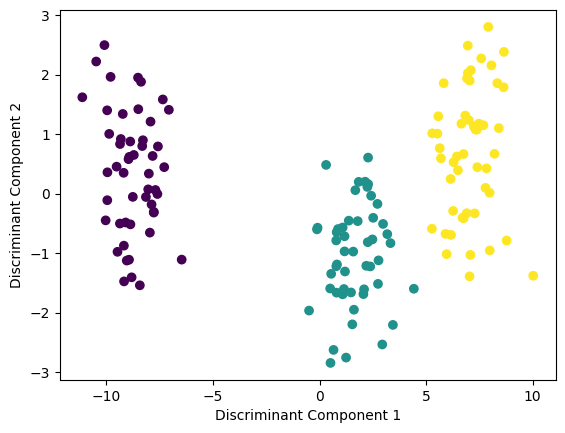

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mldataset/Iris.csv')

# Splitting the data into the features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Converting the target variable into numeric format
y = pd.factorize(data.iloc[:, -1])[0]

# Create an LDA object
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model on the data 
#and transform the data to the new coordinate system

X_lda = lda.fit_transform(X, y)

# Plot the transformed data in a scatter plot, coloring points by target variable
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.xlabel('Discriminant Component 1')
plt.ylabel('Discriminant Component 2')
plt.show()


Question-4:Briefly identify the difference between PCA and LDA

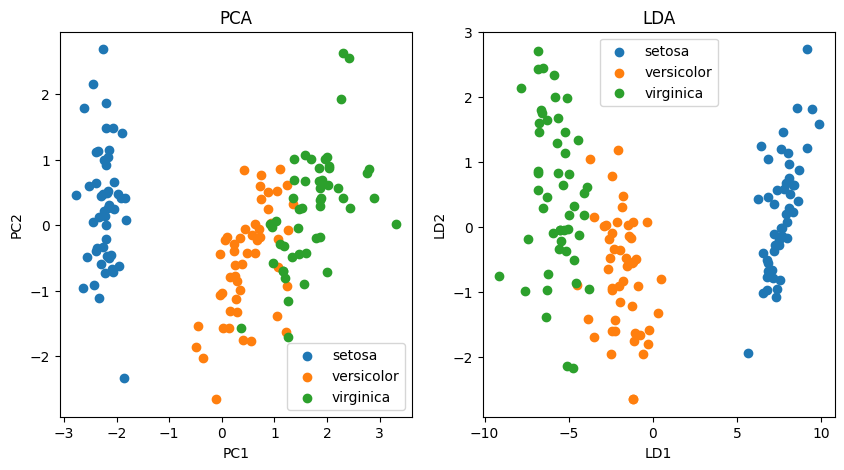

In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
targetnames = iris.target_names

# Scale the features 
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# Applying PCA with k=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying LDA with k=2
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(121)
for i, target_name in enumerate(targetnames):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()

plt.subplot(122)
for i, target_name in enumerate(targetnames):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA')
plt.legend()

plt.show()